In [1]:
import numpy as np
from matplotlib import pyplot as pl

# Ajuste de função

Existem problemas em que medimos os valores $x$ e $y$, e sabemos que $y = y(x)$ (é função de $x$) mas não sabemos exatamente como essas duas variáveis estão relacionadas. O que podemos fazer então é chutar relações entre $x$ e $y$ envolvendo parâmetros adicionais e encontrar esses parâmetros.

Por exemplo, se a relação for linear ($y = a\cdot x + b$), podemos usar as funções abaixo para estimar $a$ e $b$.
Se a relação for quadrática ($y = a\cdot x^2 + b\cdot x +c$), vamos estimar $a$, $b$ e $c$.

E qualquer outra função maluca que você quiser.

In [131]:
# criando uma função de chi²
def chisqr(obs,exp,err=None):
    chi = 0

    # levar em conta o erro
    if err:
        for i in range(len(obs)):
            chi = chi + ((obs[i]-exp[i])**2)/(err[i]**2)

    # sem erro
    else:
        for i in range(len(obs)):
            chi = chi + ((obs[i]-exp[i])**2)
    return chi


# função resíduos
def res(obs, exp):
    res = np.zeros(len(obs))
    for i in range(len(obs)):
        res[i] = obs[i] - exp[i]
    return res


# valor esperado e incerteza calculados a partir da curva de probabilidades
def esper(coisa,prob):
    esper = np.sum(coisa*prob)/np.sum(prob)
    return esper


def erro(coisa,prob):
    erro = ((esper(coisa**2,prob)-(esper(coisa,prob))**2))**(1/2)
    return erro

## Exemplo

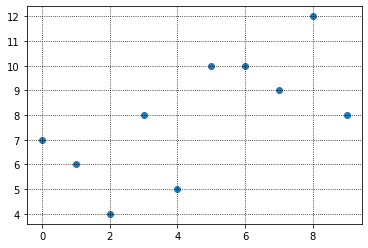

In [193]:
# digamos que estes sejam os dados observados
x = np.arange(0,10,1)
y = np.array([7, 6, 4, 8, 5, 10, 10, 9, 12, 8])

pl.scatter(x,y)
pl.grid(ls=':',c='k')

Vamos supor um fit linear $y = a\cdot x + b$

In [194]:
# função a ser ajustada
def f(a,b):
    return a*x+b

Ao introduzir os novos parâmetros, precisamos já ter uma ideia mais ou menos de em que intervalo de valores eles caem (você não precisa se preocupar tanto com um chute ruim porque dá pra refazer depois)

A função np.linspace toma os argumentos < valor inicial >, < valor final >, e < nº subdivisões >. Se você não tem muita confiança no chute inicial, vale mais a pena escolher um intervalo largo sem muitas subdivisões pro cálculo adiante não demorar muito)

In [195]:
# vetorizando
a_v = np.linspace(0,5,50)
b_v = np.linspace(0,10,50)

na = len(a_v)
nb = len(b_v)

Agora definimos a matriz chi, que vai guardar a informação do quanto a função $f(x)$ difere dos valores de $y(x)$ para cada combinação dos parâmetros $a$ e $b$ que determinamos acima. Por isso a matriz chi deve ter o mesmo número de dimensões que o número de combinações que queremos testar.

Exemplo: definindo $500$ subdivisões de $a$ e $500$ de $b$, a matriz chi terá $500*500 = 250000$ valores!

In [196]:
chi = np.zeros((na,nb))

# isso pode demorar dependendo de quantas subdivisões você
# escolheu pra cada parâmetro
for i in range(na):
    for j in range(nb):
        chi[i][j] = chisqr(y,f(a_v[i],b_v[j]))

Em seguida calculamos a matriz probabilidade supondo que a distribuição dos erros dos parâmetros é gaussiana. Essencialmente vamos montar uma matriz para nos dizer qual a probabilidade de cada uma das combinações de $a$ e $b$ calculadas nos dar a relação observada entre $x$ e $y$.

In [202]:
prob = np.zeros((na,nb))

# pegamos o menor valor da matriz chi
# (vai corresponder ao valor de maior prob)
mi = np.min(chi)

# calculamos as probs
prob = np.exp(-(chi-mi)**2)


# normalizamos as probs para garantir que a soma das probs
# de todas as combinações dá 1
pmarg = np.sum(prob)
prob = np.matrix.transpose(prob)/pmarg

# distribuição de probs dos valores de a
pmarga = np.sum(prob,axis=0)
pmarga = pmarga / np.sum(pmarga)

# distribuição de probs dos valores de b
pmargb = np.sum(prob,axis=1)
pmargb = pmargb / np.sum(pmargb)

Daí, uma vez que temos as distribuições é só usar a função do valor esperado pra calcular o valor esperado e a incerteza dos parâmetros:

In [203]:
# valor esperado de a
A = esper(a_v,pmarga)
errA = erro(a_v,pmarga)
print('a =', A,' + ',errA)

# valor esperado de b
B = esper(b_v,pmargb)
errB = erro(b_v,pmargb)
print('b =', B,' + ',errB)

a = 0.5324652268433199  +  0.0631686420462543
b = 5.502893429971211  +  0.3345708494920875


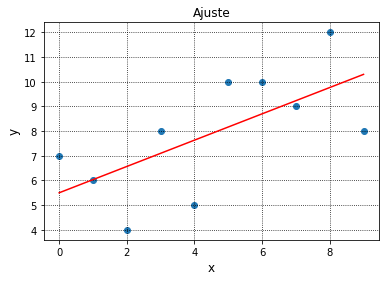

In [204]:
# plotar o ajuste
#pl.errorbar(x,y,yerr=err,fmt='b.')
pl.scatter(x,y)
pl.plot(x,f(A,B),c='r')
pl.xlabel('x', fontsize=12)
pl.ylabel('y', fontsize=12)
pl.title('Ajuste', fontsize=12)
pl.grid(ls=':',c='k')

Visualizando a distribuição de probabilidades dos dois parâmetros ao mesmo tempo:

Text(0, 0.5, '$b$')

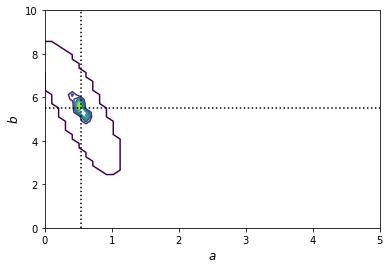

In [205]:
pl.figure()
pl.contour(a_v,b_v,prob)
pl.axhline(y=B,ls=':',c='k')
pl.axvline(x=A,ls=':',c='k')
pl.xlabel(r'$a$', fontsize = 12)
pl.ylabel(r'$b$', fontsize = 12)

Visualizando a distribuição de probabilidades de um parâmetro de cada vez:

Text(0, 0.5, '$prob_b$')

<Figure size 432x288 with 0 Axes>

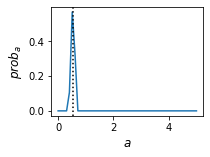

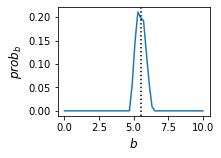

In [206]:
pl.figure()
pl.subplots(figsize=(6,2))
pl.subplot(1,2,1)
pl.plot(a_v,pmarga)
pl.axvline(x=A,ls=':',c='k')
pl.xlabel(r'$a$', fontsize = 12)
pl.ylabel(r'$prob_a$', fontsize = 12)

pl.subplots(figsize=(6,2))
pl.subplot(1,2,2)
pl.plot(b_v,pmargb)
pl.axvline(x=B,ls=':',c='k')
pl.xlabel(r'$b$', fontsize = 12)
pl.ylabel(r'$prob_b$', fontsize = 12)
